In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

### Read Data

In [2]:
df = pd.read_csv('datasets/dataset.csv')
df.head()

,Unnamed: 0,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,...,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
0,0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
3,3,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'Accident', 'WeekDay_Monday', 'WeekDay_Saturday',
       'WeekDay_Sunday', 'WeekDay_Thursday', 'WeekDay_Tuesday',
       'WeekDay_Wednesday', 'Month_2.0', 'Month_3.0', 'Month_4.0', 'Month_5.0',
       'Month_6.0', 'Month_7.0', 'Month_8.0', 'Month_9.0', 'Month_10.0',
       'Month_11.0', 'Month_12.0', 'Hour_1.0', 'Hour_2.0', 'Hour_3.0',
       'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0', 'Hour_8.0', 'Hour_9.0',
       'Hour_10.0', 'Hour_11.0', 'Hour_12.0', 'Hour_13.0', 'Hour_14.0',
       'Hour_15.0', 'Hour_16.0', 'Hour_17.0', 'Hour_18.0', 'Hour_19.0',
       'Hour_20.0', 'Hour_21.0', 'Hour_22.0', 'Hour_23.0'],
      dtype='object')

In [4]:
df = df[['air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'WeekDay_Monday', 'WeekDay_Saturday',
       'WeekDay_Sunday', 'WeekDay_Thursday', 'WeekDay_Tuesday',
       'WeekDay_Wednesday', 'Month_2.0', 'Month_3.0', 'Month_4.0', 'Month_5.0',
       'Month_6.0', 'Month_7.0', 'Month_8.0', 'Month_9.0', 'Month_10.0',
       'Month_11.0', 'Month_12.0', 'Hour_1.0', 'Hour_2.0', 'Hour_3.0',
       'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0', 'Hour_8.0', 'Hour_9.0',
       'Hour_10.0', 'Hour_11.0', 'Hour_12.0', 'Hour_13.0', 'Hour_14.0',
       'Hour_15.0', 'Hour_16.0', 'Hour_17.0', 'Hour_18.0', 'Hour_19.0',
       'Hour_20.0', 'Hour_21.0', 'Hour_22.0', 'Hour_23.0', 'Accident']]

In [5]:
df.head()

,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,...,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Accident
0,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,0.0,1.616667,...,0,0,0,0,0,0,0,0,0,1
1,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,0.0,1.520000,...,0,0,0,0,0,0,0,0,0,1
2,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,0.0,1.380000,...,0,0,0,0,0,0,0,0,0,1
3,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,0.0,1.380000,...,0,0,0,0,0,0,0,0,0,1
4,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,0.0,1.500000,...,0,0,0,0,0,0,0,0,0,1


**Class Distribution**

<AxesSubplot:xlabel='Accident', ylabel='count'>

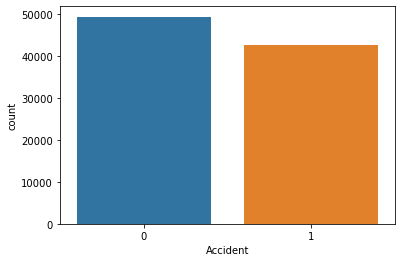

In [6]:
sns.countplot(x = 'Accident', data=df)

## I) Binary Classification

### a) Neural Network

**Create Input and Output Data**

In [7]:
X = df[df.columns[~df.columns.isin(['date', 'Accident', 'Unnamed: 0'])]]
y = df['Accident']

**Create train and test datasets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Parameters**

In [9]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

**Define Custom Dataloaders**

In [10]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [11]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

**Define Neural Net Architecture**
<img src="https://miro.medium.com/max/1400/0*CLjAAd7s6o0yfEYZ.jpg"
     alt="NN"
     style="float: left; margin-right: 10px;" />

In [24]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 53.
        self.layer_1 = nn.Linear(53, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [25]:
model = binaryClassification()
device = torch.device('cpu')
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=53, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


**Train the model**

In [26]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [27]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.58674 | Acc: 69.248
Epoch 002: | Loss: 0.56881 | Acc: 70.842
Epoch 003: | Loss: 0.56521 | Acc: 71.119
Epoch 004: | Loss: 0.56274 | Acc: 71.144
Epoch 005: | Loss: 0.56120 | Acc: 71.332
Epoch 006: | Loss: 0.56023 | Acc: 71.399
Epoch 007: | Loss: 0.55828 | Acc: 71.565
Epoch 008: | Loss: 0.55659 | Acc: 71.658
Epoch 009: | Loss: 0.55508 | Acc: 71.683
Epoch 010: | Loss: 0.55408 | Acc: 71.710
Epoch 011: | Loss: 0.55277 | Acc: 71.807
Epoch 012: | Loss: 0.55079 | Acc: 72.024
Epoch 013: | Loss: 0.54960 | Acc: 71.999
Epoch 014: | Loss: 0.54778 | Acc: 72.168
Epoch 015: | Loss: 0.54768 | Acc: 72.088
Epoch 016: | Loss: 0.54550 | Acc: 72.421
Epoch 017: | Loss: 0.54396 | Acc: 72.364
Epoch 018: | Loss: 0.54346 | Acc: 72.544
Epoch 019: | Loss: 0.54214 | Acc: 72.393
Epoch 020: | Loss: 0.54147 | Acc: 72.618
Epoch 021: | Loss: 0.54033 | Acc: 72.630
Epoch 022: | Loss: 0.53841 | Acc: 72.620
Epoch 023: | Loss: 0.53927 | Acc: 72.843
Epoch 024: | Loss: 0.53778 | Acc: 72.791
Epoch 025: | Los

**Test the model**

In [28]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

**Classification Report**

In [29]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     16332
           1       0.68      0.68      0.68     14055

    accuracy                           0.70     30387
   macro avg       0.70      0.70      0.70     30387
weighted avg       0.70      0.70      0.70     30387



### b) Random Forest

In [30]:
#output label
target = np.array(df['Accident'])

#input features
features = df[df.columns[~df.columns.isin(['date','Accident', 'Unnamed: 0'])]]
feature_list = list(features.columns)
features = np.array(features)

#split dataset into training and testing
train_features, test_features, train_target, test_target = train_test_split(features, 
target, test_size = 0.25, random_state = 10)


# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators= 100)

# Train the model on training data
clf.fit(train_features, train_target)

predictions = clf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_target, predictions))

#check contributions to prediction
feature_names = df.columns[~df.columns.isin(['date','Accident', 'Unnamed: 0'])]
feature_imp = pd.Series(clf.feature_importances_, index=feature_names.sort_values(ascending=False))
feature_imp

Accuracy: 0.7445375961079015


windchill                  0.064894
wind_speed_avg_10min       0.059358
wind_gust_max_10min        0.054801
wind_force_avg_10min       0.054415
wind_direction             0.054723
water_temperature          0.063665
water_level                0.063053
precipitation              0.063729
humidity                   0.011357
global_radiation           0.059332
dew_point                  0.113838
barometric_pressure_qfe    0.067733
air_temperature            0.049824
WeekDay_Wednesday          0.006572
WeekDay_Tuesday            0.008943
WeekDay_Thursday           0.017513
WeekDay_Sunday             0.006480
WeekDay_Saturday           0.006437
WeekDay_Monday             0.006567
Month_9.0                  0.002838
Month_8.0                  0.003423
Month_7.0                  0.003759
Month_6.0                  0.003959
Month_5.0                  0.003724
Month_4.0                  0.003538
Month_3.0                  0.003403
Month_2.0                  0.003949
Month_12.0                 0

## II) Mulit-Class Classification

### a) Neural Network

In [31]:
df.columns

Index(['air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level', 'WeekDay_Monday',
       'WeekDay_Saturday', 'WeekDay_Sunday', 'WeekDay_Thursday',
       'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Month_2.0', 'Month_3.0',
       'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0', 'Month_8.0',
       'Month_9.0', 'Month_10.0', 'Month_11.0', 'Month_12.0', 'Hour_1.0',
       'Hour_2.0', 'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0',
       'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0', 'Hour_12.0',
       'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0', 'Hour_17.0',
       'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0', 'Hour_22.0',
       'Hour_23.0', 'Accident'],
      dtype='object')

### b) Random Forest